## Zapisovanje besedil

Za računalniški pomnilnik si predstavljamo, da shranjuje številke; prav tako so v datotekah le številke in tudi po komunikacijskih kanalih se prenašajo le številke, tipično v paketkih po osem bitov, ki jih tipično beremo kot cela števila med 0 in 255. To nas doslej ni še nikoli zanimalo: ko smo v Pythonu napisali niz, se nismo (hvala Bogu!) nikoli ukvarjali s tem, kako je le-ta shranjen v pomnilniku. Čim gremo ven iz Pythona - v datoteko, na omrežje - pa postane to vprašanje pomembno.

Vsak znak - kot so `a`, `W`, `#`, `8`, `(`, `č`, `ć`, `ш`, `Я` in `π` ter celo `😎` in `🤶` - je potrebno zapisati z neko številko. Med mnogimi standardi, ki so si jih izmislili za to, se je obdržal ASCII, ki je vsakemu znaku prepisal kodo med 32 in 127, kode med 0 in 31 pa rezerviral za posebne ukaze.

Preberimo vsebino preproste datoteke.

In [1]:
s = open("voscilo.txt").read()

s

'Lepe praznike!'

Python je odprl datoteko, prebral številke v njej, jih razumel kot znake, kodirane v ASCII (to ni čisto res! Več kasneje.) in vrnil niz z besedilom. Lahko pa se dogovorimo tudi drugače.

In [2]:
b = open("voscilo.txt", "rb").read()

Datoteko smo odprli v načinu `rb`: `r` kot b**r**anje in `b` kot **b**ajti (običajni način je `rt` - b**r**anje in bese**t**ilo). Python po tem ne pretvori prebranega v niz temveč vrne ...

In [3]:
b

b'Lepe praznike!'

Videti je kot niz, vendar z `b` pred narekovajem. Ko to Python reč izpiše, vse številke s kodami med 32 in 127 izpiše kot pripadajoče znake (po standardu ASCII). Vseeno pa gre za številke.

In [4]:
b[0]

76

In [5]:
b[1]

101

Kako iz bajtov dobiti niz? Tako da ga *dekodiramo* z metodo `decode`, pri čemer moramo povedati, po katerem standardu. Ker (doslej) vemo samo za ASCII, poskusimo z njim.

In [6]:
b.decode("ascii")

'Lepe praznike!'

Gre tudi v drugo smer: niz lahko kodiramo (`encode`) po določenem standardu, pa dobimo bajte.

In [7]:
"Lepe praznike!".encode("ascii")

b'Lepe praznike!'

Ne mara pa za božič.

In [8]:
"Lep božič".encode("ascii")

UnicodeEncodeError: 'ascii' codec can't encode character '\u017e' in position 6: ordinal not in range(128)

### Različna kodiranja

Tudi velike noči in binkošti ne mara, nima pa težav ne z novim letom ne s hanuko ne z ramadanom. Pa ni kriv Python, kriv je ASCII, ki ne ve za šumnike. V resnici tudi ramadan in hanuka ne zna napisati, kot se zagre.

In [9]:
"رَمَضَان".encode("ascii")

UnicodeEncodeError: 'ascii' codec can't encode characters in position 0-7: ordinal not in range(128)

In [10]:
"חֲנֻכָּה".encode("ascii")

UnicodeEncodeError: 'ascii' codec can't encode characters in position 0-7: ordinal not in range(128)

V tem dokumentu so očitno zapisani vsi trije prazniki, torej se da. Ker so si izmislili kodiranja, ki vključujejo tudi neangleške znake. Eden kar uporabljenih so Microsoftovi standardi; za naše, vzhodnoevropske kraje je aktualen cp1250.

In [11]:
"Lep božič".encode("cp1250")

b'Lep bo\x9ei\xe8'

Ker znaka `ž` in `č` nista v ASCII (kar Python prepozna po tem, da sta njuni kodi večji od 127), namesto znaka izpiše `\x` in nato šestnajstiški kodi, ki sta

In [12]:
0x9e

158

in

In [13]:
0xe8

232

Za ramadan cp1250 ne bo primeren:

In [14]:
"رَمَضَان".encode("cp1250")

UnicodeEncodeError: 'charmap' codec can't encode characters in position 0-7: character maps to <undefined>

Za arabščino potrebujemo cp1256:

In [15]:
"رَمَضَان".encode("cp1256")

b'\xd1\xf3\xe3\xf3\xd6\xf3\xc7\xe4'

Francozi pa se navdušujejo nad *crème brûlée* zapisano v cp1252.

In [16]:
"crème brûlée".encode("cp1252")

b'cr\xe8me br\xfbl\xe9e'

### Splošnejši standard: Unicode

Ta reč je kar nerodna: če želiš zapisati besedilo - recimo ga shraniti v datoteko -, moraš vedeti, kakšne znake vsebuje, da se lahko odločiš za primerno kodiranje. Če vsebuje naše šumnike in arabske znake, pa imaš problem.

Da ne govorimo o branju: ko bereš datoteko, moraš vedeti, kako je zapisana, da jo boš pravilno prebral. Še hujše je bilo s spletnimi stranmi: včasih je bilo potrebno brskalnik nastaviti na določeno kodiranje in vse strani, ki so bile zakodirane drugače, so imele pač napačne znake. Kasneje so v strani dodali oznako, ki brskalniku pove, kako je kodirana. A tudi to ne reši problema različnih abeced na isti strani. In, zakaj, za božjo voljo, ne bi imeli standard, ki bi vseboval vse znake vseh pisav na svetu?

Imamo, temu se reče Unicode. Unicode vsakemu znaku priredi 32-bitno kodo.

In [17]:
ord("č")

269

In [18]:
ord("ن")

1606

In [19]:
ord("ח")

1495

Unicode ne vsebuje le arabščine in hebrejščine, ne le kitajščine in korejščine, ne le vseh emojijev, temveč celo Tolkienove vilinske pisave, klingonščina pa le neuradno, saj se pristojni odbor [boji Paramountovih avtorskih pravic](https://klingon.wiki/En/Unicode), boj pa še ni končan. Zato moremo zaenkrat napisati samo po naše: Qapla'!

Poleg tega predpisuje različne načine, kako ta, 32-bitna števila zapisati kot zaporedje (8-bitnih) bajtov. Najbolj razširjen je utf-8.

In [20]:
"Lep božič".encode("utf-8")

b'Lep bo\xc5\xbei\xc4\x8d'

In [21]:
"رَمَضَان".encode("utf-8")

b'\xd8\xb1\xd9\x8e\xd9\x85\xd9\x8e\xd8\xb6\xd9\x8e\xd8\xa7\xd9\x86'

In [22]:
"חֲנֻכָּה".encode("utf-8")

b'\xd7\x97\xd6\xb2\xd7\xa0\xd6\xbb\xd7\x9b\xd6\xb8\xd6\xbc\xd7\x94'

In, seveda, nazaj:

In [23]:
voscilo = "Vesel božič".encode("utf-8")

voscilo

b'Vesel bo\xc5\xbei\xc4\x8d'

In [24]:
voscilo.decode("utf-8")

'Vesel božič'

Če zgrešimo, ne bo dobro:

In [25]:
voscilo.decode("cp1250")

'Vesel boĹľiÄŤ'

### Ročno dekodiranje

Metodo `decode` boste najpogosteje uporabljali za podatke, pridobljene s spleta.

In [26]:
from urllib.request import urlopen

stran = urlopen("https://www.gutenberg.org/cache/epub/34126/pg34126.txt").read(100)

In [27]:
stran

b'\xef\xbb\xbfThe Project Gutenberg eBook of Za narodov blagor: Komedija v \xc5\xa1tirih dejanjih\r\n    \r\nThis ebook i'

Metoda `read`, s katero smo brali vsebino spletne strani vedno vrne bajte, saj ne ve, kako naj jih dekodira. Predvsem pa niti ni nujno, da gre za besedilo - morda je pa slika ali kaj tretjega?

Pridobljeno besedilo bomo morali zato dekodirati sami.

In [28]:
stran.decode("utf-8")

'\ufeffThe Project Gutenberg eBook of Za narodov blagor: Komedija v štirih dejanjih\r\n    \r\nThis ebook i'

Kar v redu. `\r\n` pomenita samo novo vrstico. Čuden je le še tisti `\ufeff` na začetku. MS Windows radi dodajo to reč - reče se ji BOM, [byte order mark](https://en.wikipedia.org/wiki/Byte_order_mark) - v UTF-8. Pravilnejše kodiranje za takšne datoteke je `utf-8-sig`.

In [29]:
stran.decode("utf-8-sig")

'The Project Gutenberg eBook of Za narodov blagor: Komedija v štirih dejanjih\r\n    \r\nThis ebook i'

### Nekaj še bolj koristnega za konec

Pri branju besedilnih datotek Python sam dekodira številke v besedilo, zato dobimo `str` in nam ni treba, tako kot pri podatkih s spleta, ročno klicati `decode`. Pri tem predpostavi, da je besedilo zapisano v privzetem kodiranju sistema, ki je navadno utf-8, le MS Windows še vedno vztrajajo pri Microsoftovih code pageih, zato je tam potrebno vedno ročno določiti bolj pravi *encoding*. Ta je praviloma UTF-8, v nekaterih kontekstih pa se še vedno praviloma uporabljajo code pagei. Recimo tule:

In [30]:
f = open("podnapisi.srt", "wt", encoding="cp1250")
f.write("Jože, še čevlje si zaveži, če nočeš pasti!")

42

Takšno datoteko je zato potrebno brati z ustreznim kodiranjem.

In [31]:
f = open("podnapisi.srt", encoding="cp1250")
f.read()

'Jože, še čevlje si zaveži, če nočeš pasti!'

Če zgrešimo, se zgodi nekaj, kar vsi dobro poznamo:

In [32]:
f = open("podnapisi.srt", encoding="cp1252")
f.read()

'Jože, še èevlje si zaveži, èe noèeš pasti!'

Če vam je to znano, odprite svoj najljubši predvajalnik, VLC, in mu nastavite kodiranje podnapisov:

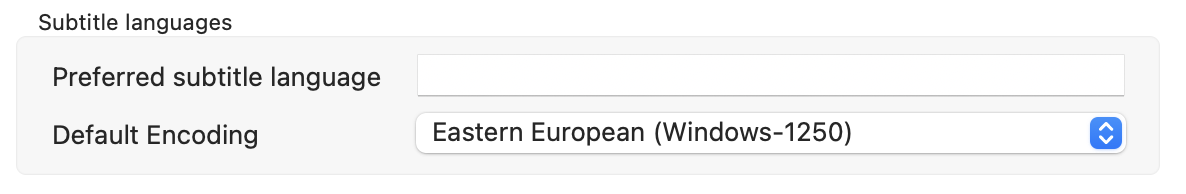

Slišim zahvale? Prosim, prosim. :)